In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [347]:
mv_db=pd.read_csv("tmdb_5000_movies.csv")
cr_db=pd.read_csv("tmdb_5000_credits.csv")

In [348]:
mv_db.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [349]:
mv=pd.read_csv("movie_new.csv")

In [350]:
mv_db.shape

(4803, 20)

In [351]:
mv_db = mv_db.merge(cr_db,on="title")

In [352]:
mv_db = mv_db[mv_db["status"]=="Released"]
mv_db["status"].unique()
mv_db.shape

(4800, 23)

In [353]:
mv.shape

(3818, 25)

In [354]:
mv_db = mv_db.drop(["budget","homepage","movie_id","vote_count","vote_average","tagline","original_language","original_title","spoken_languages","status","production_companies"],axis=1)

In [355]:
mv_db = mv_db.drop(["production_countries"],axis=1)

In [356]:
mv_db.shape

(4800, 11)

In [357]:
import ast

In [358]:
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i["name"])
    return l    

In [359]:
mv_db["genres"]=mv_db["genres"].apply(convert)

In [360]:
mv_db["keywords"]=mv_db["keywords"].apply(convert)

In [361]:
mv_db.shape

(4800, 11)

In [362]:
mv_db["crew"].iloc[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [363]:
def convert1(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        l.append(i["name"])
        counter+=1
        if(counter==3):
            break
    return l  

In [364]:
mv_db["cast"] = mv_db["cast"].apply(convert1)

In [365]:
def convert2(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if(i["job"]=="Director"):
            l.append(i["name"])
    return l  

In [366]:
mv_db["crew"] = mv_db["crew"].apply(convert2)

In [367]:
mv_db.shape

(4800, 11)

In [368]:
mv_db["popularity"].describe()

count    4800.000000
mean       21.530954
std        31.820201
min         0.000000
25%         4.724619
50%        12.965232
75%        28.364400
max       875.581305
Name: popularity, dtype: float64

In [369]:
l=[]
for i in mv_db["popularity"]:
    i=(i-mv_db["popularity"].min())/(mv_db["popularity"].max()-mv_db["popularity"].min())
    l.append(i)
mv_db["pop_norm"]=l

In [370]:
mv_db["pop_norm"].describe()

count    4800.000000
mean        0.024590
std         0.036342
min         0.000000
25%         0.005396
50%         0.014808
75%         0.032395
max         1.000000
Name: pop_norm, dtype: float64

In [371]:
mv_db = mv_db.drop(["popularity"],axis=1)

In [372]:
mv_db.shape

(4800, 11)

In [373]:
lr=[]

for i in mv_db["revenue"]:
    i=(i-mv_db["revenue"].min())/(mv_db["revenue"].max()-mv_db["revenue"].min())
    lr.append(i)
mv_db["rev_norm"]=lr

In [374]:
mv_db = mv_db.drop(["revenue"],axis=1)

In [375]:
mv_db.shape

(4800, 11)

In [376]:
lrun=[]
for i in mv_db["runtime"]:
    if i<120:
        lrun.append("1hr")
    elif i>=120 and i<180:
        lrun.append("2hr")
    else:
        lrun.append("3hr")
mv_db["runt"]=lrun        

In [377]:
mv_db.shape

(4800, 12)

In [378]:
mv_db=mv_db.drop(["runtime"],axis=1)

In [379]:
def rdate(obj):
    l=str(obj).split("-")
    k=int(l[0])
    return k

In [380]:
mv_db = mv_db.dropna()

In [381]:
mv_db

,genres,id,keywords,overview,release_date,title,cast,crew,pop_norm,rev_norm,runt
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",10-12-2009,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],0.171815,1.000000,2hr
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",19-05-2007,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],0.158846,0.344696,2hr
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,26-10-2015,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],0.122635,0.315884,2hr
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,16-07-2012,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],0.128272,0.389151,2hr
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",07-03-2012,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],0.050169,0.101916,2hr
...,...,...,...,...,...,...,...,...,...,...,...
4803,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,04-09-1992,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],0.016298,0.000732,1hr
4804,"[Comedy, Romance]",72766,[],A newlywed couple's honeymoon is upended by th...,26-12-2011,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns],0.000734,0.000000,1hr
4805,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...",13-10-2013,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith],0.001650,0.000000,2hr
4806,[],126186,[],When ambitious New York attorney Sam is sent t...,03-05-2012,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia],0.000979,0.000000,1hr


In [382]:
mv_db["release_date"] = mv_db["release_date"].apply(rdate)

In [383]:
mv_db.shape

(4796, 11)

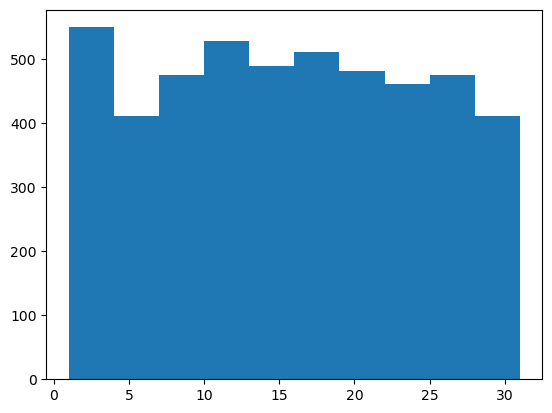

In [384]:
plt.hist(mv_db["release_date"])
plt.show()

In [385]:
mv_db = mv_db.drop(["pop_norm","rev_norm"],axis=1)

In [386]:
mv_db.shape

(4796, 9)

In [387]:
def brea(obj):
    k=[]
    for i in obj:
        k.append(i.split())
    j=[]    
    for i in k:
        r=""
        for o in i:
            r+=o
        j.append(r)    
    return j
mv_db["keywords"] = mv_db["keywords"].apply(brea)  

In [388]:
mv_db.shape

(4796, 9)

In [389]:
mv_db["cast"] = mv_db["cast"].apply(brea)  

In [390]:
mv_db["genres"] = mv_db["genres"].apply(brea)
mv_db["crew"] = mv_db["crew"].apply(brea)

In [391]:
def ovbrea(obj):
    l=obj.split()
    return l

In [392]:
mv_db["overview"] = mv_db["overview"].apply(ovbrea)

In [393]:
mv_db["runt"] = mv_db["runt"].apply(ovbrea)


In [394]:
def reld(obj):
    r=str(obj)
    l=r.split()
    return l
mv_db["release_date"] = mv_db["release_date"].apply(reld)

In [395]:
mv_db["tags"]=mv_db["genres"]+mv_db["keywords"]+mv_db["overview"]+mv_db["cast"]+mv_db["crew"]+mv_db["runt"]+mv_db["release_date"]

In [396]:
mv_db.shape

(4796, 10)

In [397]:
mv_db0 = mv_db.drop(["genres","keywords","overview","cast","runt","release_date","crew"],axis=1)

In [398]:
mv_db0.dropna()

,id,title,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, basedonnov..."
...,...,...,...
4803,9367,El Mariachi,"[Action, Crime, Thriller, unitedstates–mexicob..."
4804,72766,Newlyweds,"[Comedy, Romance, A, newlywed, couple's, honey..."
4805,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie, date, loveat..."
4806,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [399]:
mv_db1 = mv_db.drop(["genres","keywords","overview","cast","runt","release_date","crew"],axis=1)

In [400]:
def join(obj):
    k=""
    for i in obj:
        k+=i
        k+=" "
    return k    

In [401]:
mv_db0["tags"] = mv_db0["tags"].apply(join)

In [402]:
mv_db0.tags = mv_db0.tags.apply(lambda x:x.lower())

In [403]:
mv_db0.tags.shape

(4796,)

mv_db1.tags.shape

In [404]:
import nltk

In [405]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [406]:
def stem(text):
    r=[]
    for i in text.split():
        r.append(ps.stem(i))
    return " ".join(r)    

In [407]:
mv_db0.tags = mv_db0.tags.apply(stem)

In [408]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words="english")

In [409]:
vecs = cv.fit_transform(mv_db0.tags).toarray()

In [410]:
vecs.size

23980000

In [411]:
#cv.get_feature_names()

In [412]:
from sklearn.metrics.pairwise import cosine_similarity

In [413]:
mv_db0

,id,title,tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...
...,...,...,...
4803,9367,El Mariachi,action crime thriller unitedstates–mexicobarri...
4804,72766,Newlyweds,comedi romanc a newlyw couple' honeymoon is up...
4805,231617,"Signed, Sealed, Delivered",comedi drama romanc tvmovi date loveatfirstsig...
4806,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [414]:
sim=cosine_similarity(vecs)
sim.shape

(4796, 4796)

In [415]:
sim[0]

array([1.        , 0.10540926, 0.10846523, ..., 0.06454972, 0.        ,
       0.        ])

In [416]:
mv_db0[mv_db0["title"]=="My Date with Drew"]

,id,title,tags
4807,25975,My Date with Drew,documentari obsess camcord crush dreamgirl eve...


In [417]:
mv_db0.dropna()

,id,title,tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...
...,...,...,...
4803,9367,El Mariachi,action crime thriller unitedstates–mexicobarri...
4804,72766,Newlyweds,comedi romanc a newlyw couple' honeymoon is up...
4805,231617,"Signed, Sealed, Delivered",comedi drama romanc tvmovi date loveatfirstsig...
4806,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [418]:
mv_db0.shape

(4796, 3)

In [419]:
mv_db0

,id,title,tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...
...,...,...,...
4803,9367,El Mariachi,action crime thriller unitedstates–mexicobarri...
4804,72766,Newlyweds,comedi romanc a newlyw couple' honeymoon is up...
4805,231617,"Signed, Sealed, Delivered",comedi drama romanc tvmovi date loveatfirstsig...
4806,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [420]:
def recommend(title):
    movie_index = mv_db0[mv_db0["title"]==title].index[0]
    dist = sim[movie_index]
    movies_list=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]
    mv_list=[]
    for i in movies_list:
        mv_list.append(mv_db0.iloc[i[0]].title)
    return mv_list    

In [421]:
mvl = recommend("Avatar")
mvl

['Aliens',
 'Aliens vs Predator: Requiem',
 'Independence Day',
 'Small Soldiers',
 'Falcon Rising']